# Tarea - Caminata aleatoria y simulación montecarlo

Nombre: Camila Daniela Zapata Castañeda

Fecha: 02/Oct/2023

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [10]:
import random
va = ['x', 'y', 'z']
di = [-1, 1]
resultados = []
x = [0]
y = [0]
z = [0]
for j in range(10000):
    resultado1 = random.choice(va)
    resultado2 = random.choice(di)
    if resultado1 == 'x':
        if resultado2 == 1:
            x.append(x[-1] + 1)
            y.append(y[-1] + 0)
            z.append(z[-1] + 0)
        else:
            x.append(x[-1] - 1)
            y.append(y[-1] + 0)
            z.append(z[-1] + 0)
    elif resultado1 == 'y':
        if resultado2 == 1:
            x.append(x[-1] + 0)
            y.append(y[-1] + 1)
            z.append(z[-1] + 0)
        else:
            x.append(x[-1] + 0)
            y.append(y[-1] - 1)
            z.append(z[-1] + 0)
    elif resultado1 == 'z':
        if resultado2 == 1:
            x.append(x[-1] + 0)
            y.append(y[-1] + 0)
            z.append(z[-1] + 1)
        else:
            x.append(x[-1] + 0)
            y.append(y[-1] + 0)
            z.append(z[-1] - 1)
    

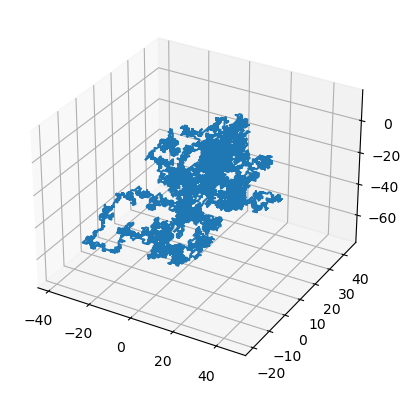

In [11]:
# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
xv = np.array([x])
yv = np.array([y])
zv = np.array([z])

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(xv, yv, zv)

# Mostramos el gráfico
plt.show()

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

In [12]:
import random
moneda = ["Aguila", "Sello"]
Resultados = [20]
C = Resultados[-1]
Volados = [0]
while C > 0:
    Volados.append(Resultados[-1] + 1)
    Sas = random.choice(moneda)
    if Sas == "Aguila":
        if C >= 6:
            Resultados.append(Resultados[-1] + C/2)
        else:
            Resultados.append(Resultados[-1] + 2)
    elif Sas == "Sello":
        if C >= 6:
            Resultados.append(Resultados[-1] -C/2)
        else:
            Resultados.append(Resultados[-1] -2)
    C = Resultados[-1]

In [13]:
Resultados

[20,
 30.0,
 15.0,
 22.5,
 11.25,
 16.875,
 8.4375,
 12.65625,
 6.328125,
 3.1640625,
 5.1640625,
 3.1640625,
 1.1640625,
 3.1640625,
 1.1640625,
 3.1640625,
 5.1640625,
 7.1640625,
 3.58203125,
 1.58203125,
 -0.41796875]

[20,
 30.0,
 45.0,
 67.5,
 33.75,
 50.625,
 25.3125,
 12.65625,
 18.984375,
 28.4765625,
 14.23828125,
 7.119140625,
 3.5595703125,
 1.5595703125,
 -0.4404296875]

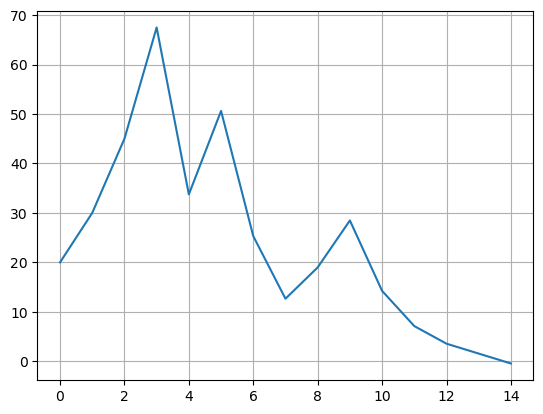

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


m = len(Resultados)
x = np.linspace(0, m-1, m)
y = Resultados

plt.figure()
plt.plot(x, y)
plt.grid()
Resultados

In [14]:
Final = []
for i in range(10000):
    import random
    moneda = ["Aguila", "Sello"]
    Resultados = [20]
    C = Resultados[-1]
    Volados = [0]
    while C > 0:
        C = Resultados[-1]
        Volados.append(Resultados[-1] + 1)
        Sas = random.choice(moneda)
        if Sas == "Aguila":
            if C >= 6:
                Resultados.append(Resultados[-1] + C/2)
            else:
                Resultados.append(Resultados[-1] + 2)
        elif Sas == "Sello":
            if C >= 6:
                Resultados.append(Resultados[-1] -C/2)
            else:
                Resultados.append(Resultados[-1] -2)
    # guardar resultado de la simulación
    Final.append(len(Volados)) 
promedio = np.mean(Final)
promedio

28.1181

Text(0, 0.5, 'Frecuencia')

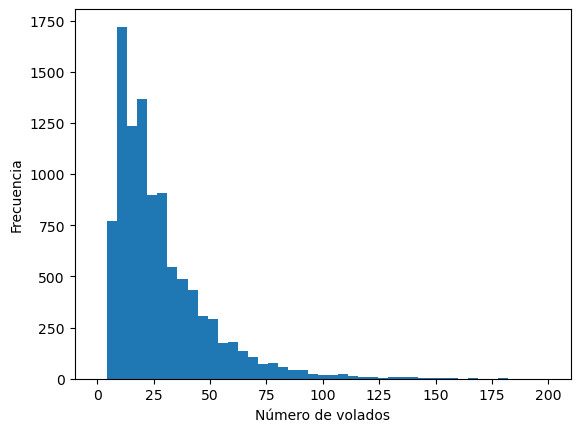

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.hist(Final, bins=45, range=(0,200))
plt.xlabel("Número de volados")
plt.ylabel("Frecuencia")